<a href="https://colab.research.google.com/github/oonhy/Data/blob/main/SNU/practice_week_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plot_transformation(matrix, vectors):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    titles = ['Original space', 'Transformed space']

    for i, title in enumerate(titles):
        ax[i].axhline(0, color='gray', lw=0.5)
        ax[i].axvline(0, color='gray', lw=0.5)
        ax[i].grid(True, which='both', linestyle='--', lw=0.5)
        ax[i].set_xlim(-10, 10)
        ax[i].set_xticks(np.arange(-10, 11, 1))
        ax[i].set_ylim(-10, 10)
        ax[i].set_yticks(np.arange(-10, 11, 1))
        ax[i].set_aspect('equal')
        ax[i].set_title(title, fontsize=15, weight='bold')

    ax[0].scatter(vectors[:, 0], vectors[:, 1], c='blue', s=50, edgecolor='black', alpha=0.7)
    transformed_vectors = np.dot(matrix, vectors.T).T
    ax[1].scatter(transformed_vectors[:, 0], transformed_vectors[:, 1], c='red', s=50, edgecolor='black', alpha=0.7)

    plt.tight_layout()
    plt.show()

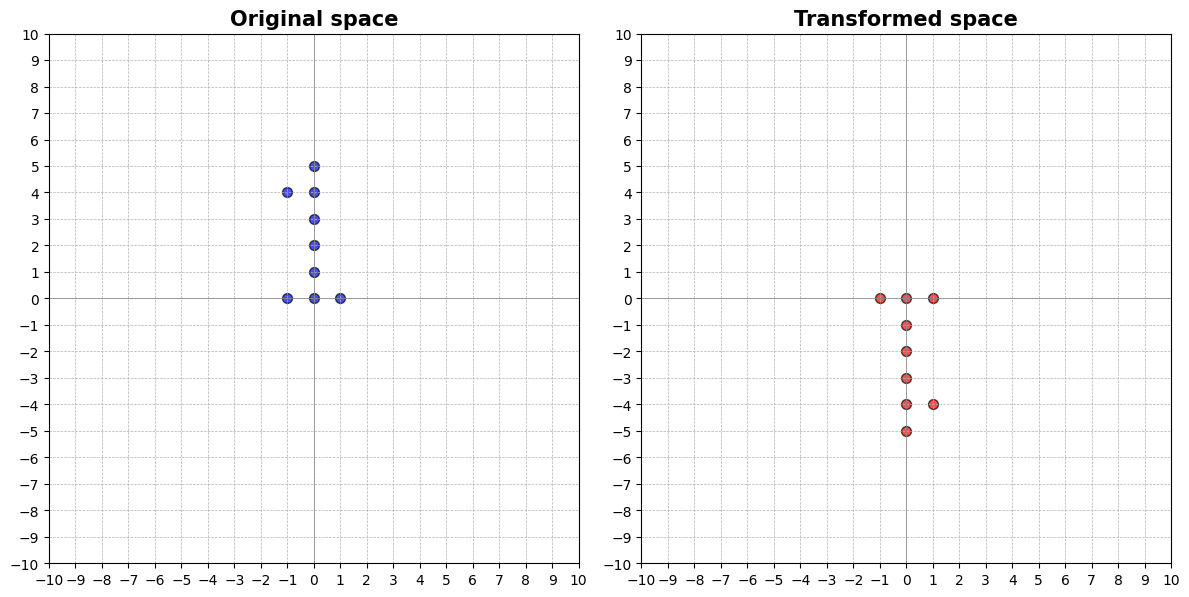

In [4]:
import numpy as np

# Example vectors
vectors = np.array([[-1, 4], [0, 5], [0, 4],
                    [0, 3],  [0, 2], [0, 1],
                    [0, 0], [-1, 0], [1, 0]])

# Transformation matrix
A = np.array([[-1, 0],
              [0, -1]])
# shear?????
B = np.array([[-1, 0],
              [0, -1]])

plot_transformation(A, vectors)

In [3]:
import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','label'])
df

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
from sklearn.preprocessing import StandardScaler

features = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = df.loc[:, features].values
y = df.loc[:,['label']].values

X = StandardScaler().fit_transform(X)
pd.DataFrame(data=X, columns=features)

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pcs = pca.fit_transform(X)

pca.explained_variance_ratio_

In [ ]:
df_pcs = pd.DataFrame(data = pcs, columns = ['pc_1', 'pc_2'])
df_final = pd.concat([df_pcs, df[['label']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.grid()

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['#EF8068', '#469CB3', '#92D050']
for target, color in zip(targets, colors):
    indicesToKeep = df_final['label'] == target
    ax.scatter(df_final.loc[indicesToKeep, 'pc_1'],
               df_final.loc[indicesToKeep, 'pc_2'],
               c = color, s = 50)
ax.legend(targets)
plt.show()